In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
def GKernel(sigma):
  m = int(np.floor(3*sigma + 0.5))
  N = int(2*m+1)
  g = np.zeros(N);

  suma = 0
  for n in range(1,m+1):
    g[m+n] = np.exp(- n**2 / (2*sigma**2))
    suma += g[m+n]

  suma = 1 + 2*suma

  for n in range(1,m+1):
    g[m+n] /= suma
    g[m-n] = g[m+n]
  g[m]=1/suma

  return g

In [ ]:
def GDerivadasKernel(sigma=1, orden=0):
  """ 
  Args:
  simga int , orden 1-7
  Retorna: gausiana por n orden de derivada 
   """
  if orden >= 0 and orden < 7:
    g = GKernel(sigma)
    gz = g.size
    mu = int(np.floor(3*sigma + 0.5))
    a = np.zeros(g.size)
    if (orden == 0):
      return g
    if (orden == 1):
      return [ g[x]*(mu - x)/sigma**2  for  x in range(gz)]
    if (orden == 2):
      return [  g[x]*(((mu-x)**2 - sigma **2)/sigma**4)  for x in range(gz)]
    if (orden == 3):
      return [  g[x]*(3*sigma**2*(x - mu) - (x - mu)**3)/sigma**6  for x in range(gz)]
    if (orden == 4):
      return [  g[x]*(3*sigma**4 - 6*sigma**2*(x - mu)**2 + (x - mu)**4)/sigma**8  for x in range(gz)]
    if (orden == 5):
      return [  g[x]*(10*sigma**2*(x - mu)**3 + 15*sigma**4*(mu - x) - (x - mu)**5)/sigma**10  for x in range(gz)]
    if (orden == 6):
      return [  g[x]*(-15*sigma**6 - 15*sigma**2*(x - mu)**4 + 45*sigma**4*(x - mu) + (x - mu)**6)/sigma**12  for x in range(gz)]
  else:
    raise Exception("Ingresar orden 1-7")


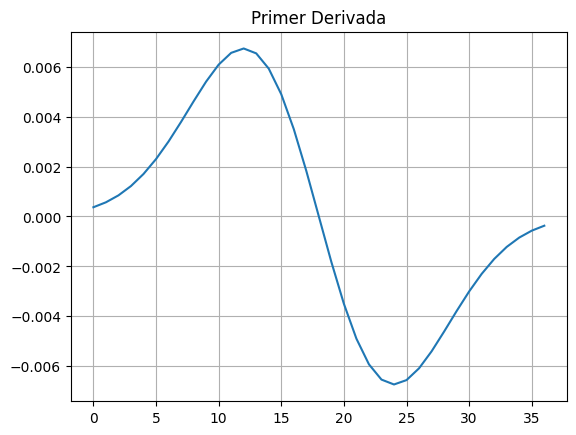

In [ ]:
pd = GDerivadasKernel(6, 1)
plt.title('Primer Derivada')
plt.plot(pd, '-',)
plt.grid()
plt.show()

In [ ]:
def convolveDesacopladaDot(img, kernelx, kernely):
    
    if(kernelx.size != kernely.size):
      raise Exception("Kernels deben ser del mismo tamaño")

    kernelx = np.flip(kernelx)
    kernely = np.flip(kernely)

    nrows, ncols = img.shape
    k_size = kernelx.size
    # krows, kcols = kernel.shape
    pad_size = (k_size - 1) // 2
    padded_img = np.pad(img, pad_size, mode='constant')
    # print(padded_img)
    output = np.zeros((nrows, ncols))

    for i in range(ncols):
      output[i,: ]= convolveDot(img[i, :], kernelx)
    # print(output)
    output2 = np.zeros((nrows, ncols))

    for j in range(nrows):
      output2[:, j ]= convolveDot(output[ :, j], kernely)
      # print(img[:, j])
    # print(output2)
    return output2

def convolveDot(signal, kernel):
    ker_size = kernel.size
    sig_size = signal.size
    # kernel = kernel[::-1]
    pad_size = (ker_size - 1) // 2
    padded_signal = np.pad(signal, pad_size, mode='constant')
    output = np.zeros(sig_size)
    output = [np.dot(padded_signal[k:k+ker_size], kernel) for k in range(sig_size)]
    # print(f"a: {output}" )
    # for k in range(sig_size):
    #     output[k] = np.dot(padded_signal[k:k+ker_size], kernel)
    # print(output)
    return output

In [ ]:
img = np.zeros((256, 256))
img[127][127] = 1

d0 = np.array(GDerivadasKernel(10, 0))
pd = np.array(GDerivadasKernel(10, 1))

x = convolveDesacopladaDot(img, pd, d0)



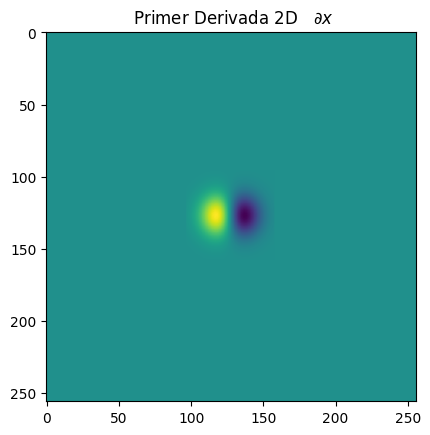

In [ ]:
plt.title(' Primer Derivada 2D  $\ \partial{x} $')
plt.imshow(x)
plt.show()

In [ ]:
y = convolveDesacopladaDot(img, d0, pd)

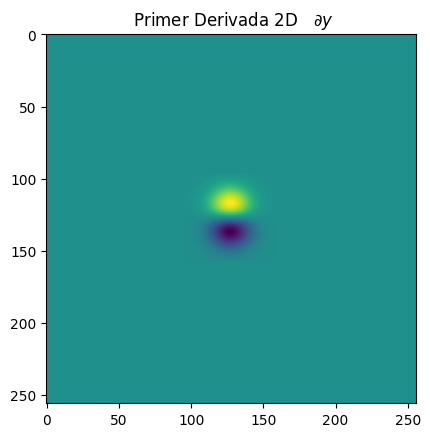

In [ ]:
plt.title(' Primer Derivada 2D  $\ \partial{y} $')
plt.imshow(y)
plt.show()

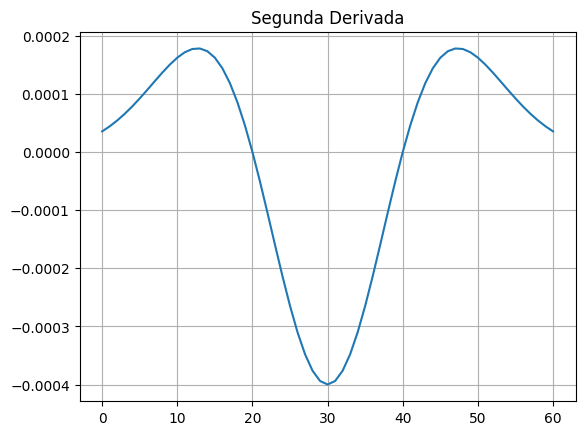

In [ ]:
sd = GDerivadasKernel(10, 2)
plt.title('Segunda Derivada')
plt.plot(sd, '-',)
plt.grid()
plt.show()

In [ ]:
img = np.zeros((256, 256))
img[127][127] = 1

d0 = np.array(GDerivadasKernel(10, 0))
pd = np.array(GDerivadasKernel(10, 1))
sd = np.array(GDerivadasKernel(10, 2))




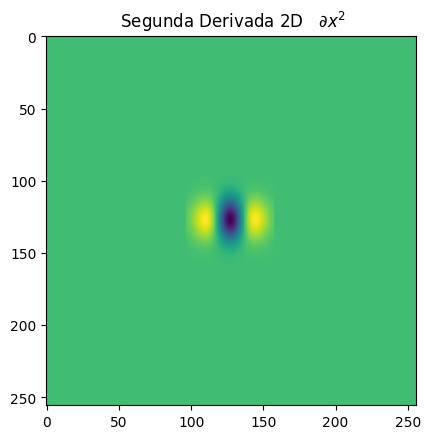

In [ ]:
xx = convolveDesacopladaDot(img, sd, d0)
plt.title(' Segunda Derivada 2D  $\ \partial{x^2} $')
plt.imshow(xx)
plt.show()

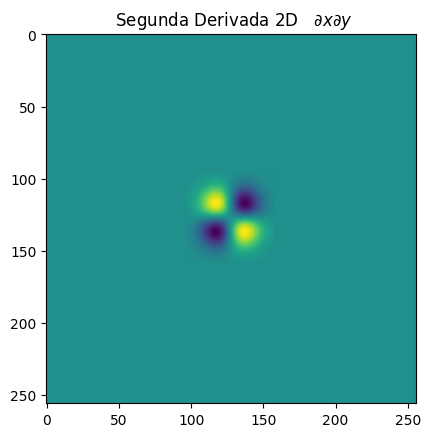

In [ ]:
xy = convolveDesacopladaDot(img, pd, pd)
plt.title(' Segunda Derivada 2D  $\ \partial{x}\partial{y} $')
plt.imshow(xy)
plt.show()

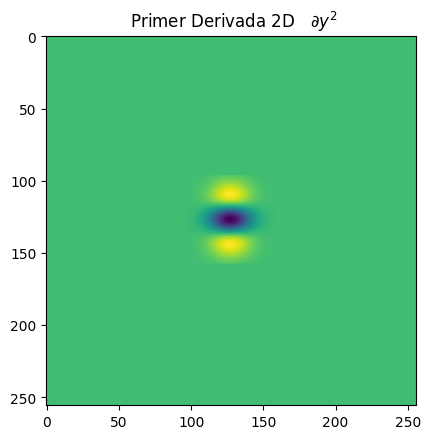

In [ ]:
yy = convolveDesacopladaDot(img, d0, sd)
plt.title(' Primer Derivada 2D  $\ \partial{y^2} $')
plt.imshow(yy)
plt.show()